## Problem Statement
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

we have database for India.We need to predict:- 1.primary_fuel,which is categorical column,So It is a classification Problem. 2.capacity_mw ,which is continuous data,so it is a Regression problem.

In [141]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform,StandardScaler,PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge,RidgeCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [77]:
df=pd.read_csv('database_IND.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

1.there are so many missing values in the dataset,and there few object type columns, we need to do necessary data preprocessing                                                                                                               
2.So we can see other_fuel2,other_fuel3,wepp_id,estimated_generation_gwh have not any data or only 1 data.So will drop these columns

 ## Categorical column:-
country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source

## numerical column:
capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh

In [78]:
df.drop(columns=['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace =True)

In [13]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [14]:
df.shape

(907, 21)

In [15]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


# Exploratory Data Analysis

## Univariate Analysis

In [16]:
#country
df['country'].value_counts()

IND    907
Name: country, dtype: int64

we are only dealing with one country so we can drop this column

In [17]:
#country_long
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

we are only dealing with one country so we can drop this column

In [18]:
#name
df['name'].value_counts()

Gorsar Wind Farm                1
Pratapgarh Solar Power Plant    1
DUGGAVATHI MILL                 1
Powerica Jangi Vandjiya         1
NAGPUR GMT                      1
                               ..
LNJP Bahla Basti Wind Farm      1
RANGANADI                       1
Bhadrada Solar Power Plant      1
HAVALGA SUGAR                   1
BELLARY DG                      1
Name: name, Length: 907, dtype: int64

Name will not have any impact on the target columns so it can also be dropped

In [19]:
#gppd_idnr
df['gppd_idnr'].value_counts()

IND0000115    1
WRI1019955    1
WRI1026182    1
IND0000180    1
IND0000070    1
             ..
WRI1026110    1
IND0000253    1
IND0000233    1
IND0000225    1
WRI1019973    1
Name: gppd_idnr, Length: 907, dtype: int64

this is id column and it will not have any impact on the output

In [20]:
#primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

this is our taget varible and we see there is some data imbalance

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

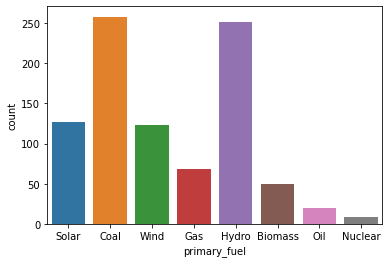

In [22]:
sns.countplot(df['primary_fuel'])

Mostly coal is used as primary fuel followeby hydro followed by solar and oil is used least.

In [24]:
#other_fuel1
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

80% of data is missing in this column so we can drop of this column

In [25]:
## owner
df['owner'].value_counts()

Sterling Agro Industries ltd.                            4
Jk Cement ltd                                            4
Acc Acc ltd                                              4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)    3
SWPPL                                                    3
                                                        ..
Sangam Spinners ltd                                      1
Harsha Engineers Limited                                 1
Madhav Solar Private Limited                             1
Essel Clean Energy Limited                               1
Unity Power Limited                                      1
Name: owner, Length: 280, dtype: int64

70% of data is missing in this column

In [26]:
##source
df['source'].value_counts()

Central Electricity Authority                519
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Bannari Sugars ltd                             1
Coal Mi ICM                                    1
Sepset Constructio te                          1
Power Private edM/Pdf                          1
Varam Pvt ltd                                  1
Name: source, Length: 191, dtype: int64

In [28]:
##url
df['url']

0      http://www.nrel.gov/csp/solarpaces/project_det...
1                        http://www.ultratechcement.com/
2      https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3                                 http://www.cea.nic.in/
4                                 http://www.cea.nic.in/
                             ...                        
902                               http://www.cea.nic.in/
903                            http://karnatakapower.com
904    https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...
905                             http://www.hzlindia.com/
906    https://cdm.unfccc.int/Projects/DB/RWTUV134503...
Name: url, Length: 907, dtype: object

url will not impact our label it can be removed

In [30]:
## geolocation_source
df['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

there are few missing values in this it can be easily replaced with 'WRI'

In [32]:
pd.crosstab(df['geolocation_source'],df['primary_fuel'])

primary_fuel,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Solar,Wind
geolocation_source,,,,,,,,
Industry About,0,0,0,0,0,0,119,0
National Renewable Energy Laboratory,0,0,0,0,0,0,4,0
WRI,50,258,69,251,9,20,0,108


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

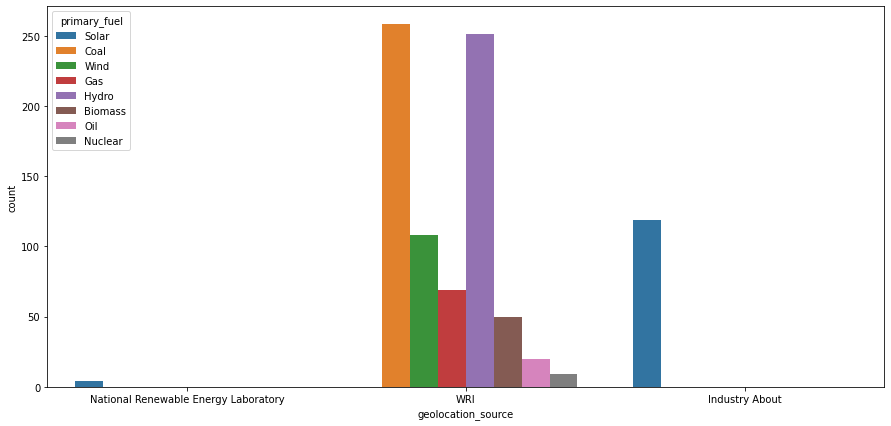

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(df['geolocation_source'],hue=df['primary_fuel'])

In [ ]:
86% of geolocation source is WRI,so this column will not have much impact on the labe;

In [37]:
# generation_data_source
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

there is only one value in this so it cant impact the target,it can be dropped off

In [70]:
# generation_data_source
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [ ]:
So we can see year_of_capacity_data has only one type of value.So it can be dropped as it is not of much use.

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

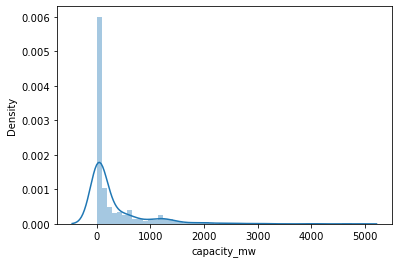

In [38]:
#capacity_mw
sns.distplot(df['capacity_mw'])

this skewed right

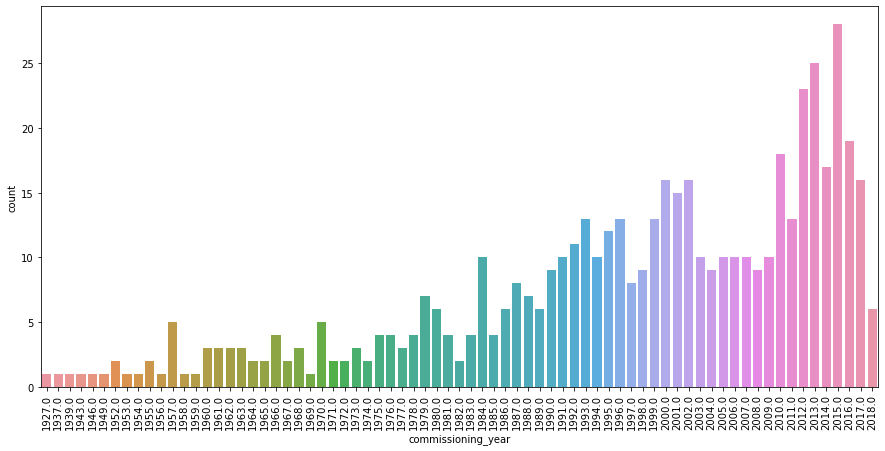

In [42]:
#commissioning_year
plt.figure(figsize=(15,7))
sns.countplot(df["commissioning_year"])
plt.xticks(rotation=90)
plt.show()

In [43]:
df['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

there are so many missing values in this column

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

# Bivariate Analysis

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

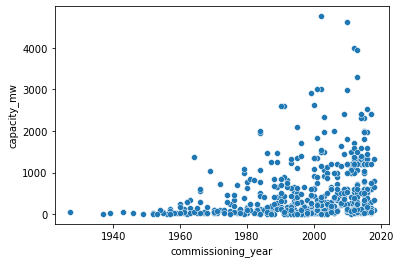

In [46]:
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)

In the above scatter plot we can see that the electricity generating capacity measured in mega watts was pretty low in the olden times as compared to recent years

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

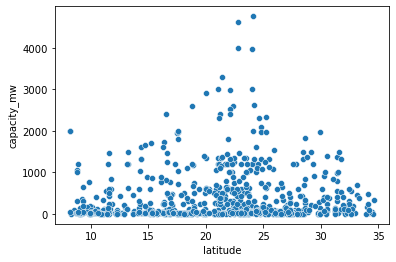

In [47]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

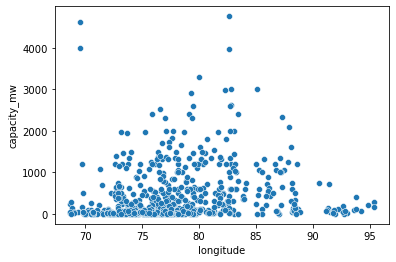

In [48]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)

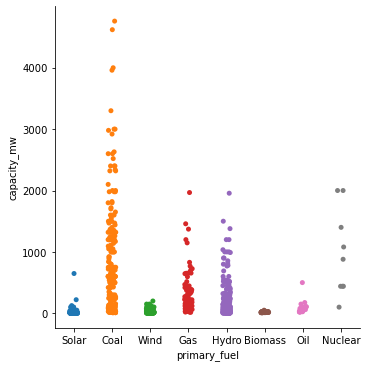

In [51]:
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)

In the above categorical plot we can see that coal is the highest contender when it comes to generating electricity and biomass is used the least.

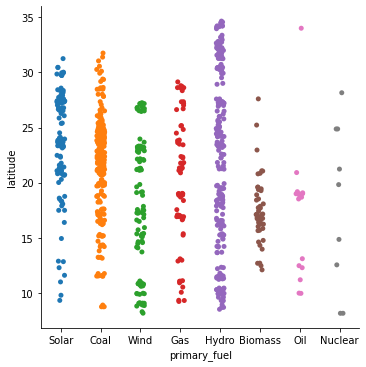

In [52]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)

In the above categorical plot we can see that hydro fuel type is distributed across all the latitude values considering the water bodies that help in generating electricity at a power plant.

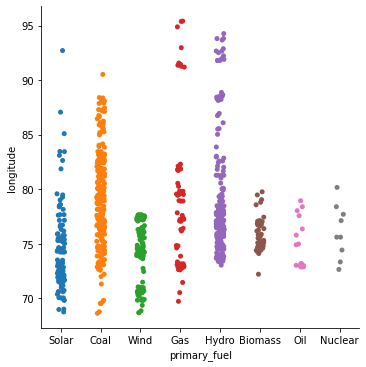

In [53]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)

 land lock areas rely on coal for electricity generation and costal area rely mostly on the hydro fuel type

# Data Preprocessing

In [79]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [65]:
df.shape

(907, 21)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

We can remove columns with too many missing values and also columns that will no have any impact on the target

In [80]:
df.drop(['other_fuel1','owner','country','country_long','name','gppd_idnr','url','generation_gwh_2014','generation_gwh_2015',
         'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_data_source'],axis=1,inplace=True)

Have dropped all the column that had more than 50% of missing data since it made no sense to treat such a huge chunk of missing value and ultimately make our model biased towards those missing value treated data.

In [81]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

So we can see year_of_capacity_data has only one type of value,so it can be dropped

In [82]:
df.shape

(907, 7)

In [83]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

In [85]:
# filling the missing values
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            907 non-null    float64
 2   longitude           907 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  907 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  907 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


In [86]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

In [90]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


# Checking Correaltion

In [88]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year
capacity_mw,1.000000,0.050984,0.195882,-0.004072
latitude,0.050984,1.000000,0.036362,0.034519
longitude,0.195882,0.036362,1.000000,-0.159025
commissioning_year,-0.004072,0.034519,-0.159025,1.000000


<AxesSubplot:>

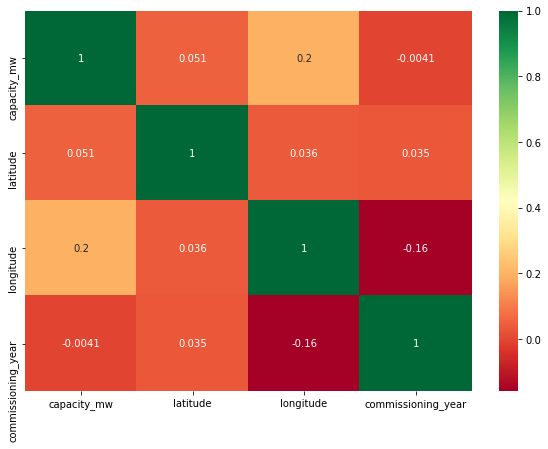

In [89]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

longitude has positive correlation of 0.2 with target(capacity_mw)

# Checking Outliers

<AxesSubplot:xlabel='capacity_mw'>

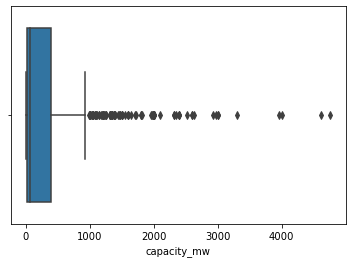

In [91]:
sns.boxplot(df['capacity_mw'])

<AxesSubplot:xlabel='latitude'>

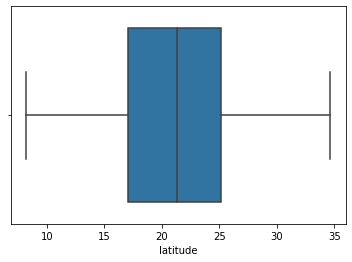

In [92]:
sns.boxplot(df['latitude'])

<AxesSubplot:xlabel='longitude'>

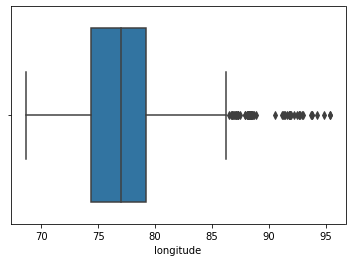

In [93]:
sns.boxplot(df['longitude'])

we see that there are outliers present in the column and we need to properly handle them

<AxesSubplot:xlabel='commissioning_year'>

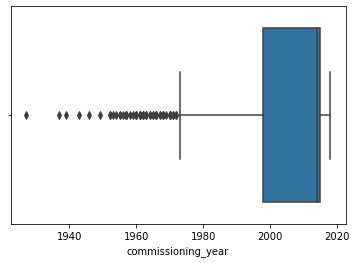

In [94]:
sns.boxplot(df['commissioning_year'])

we see that there are outliers present in the column and we need to properly handle them

# Using Z Score to remove outliers

In [96]:
df_columns=df[['capacity_mw','longitude','commissioning_year']]
z=np.abs(zscore(df_columns))


In [97]:
new_df = df[(z<3).all(axis=1)]
new_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,2015.0,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


# Checking Skewness

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

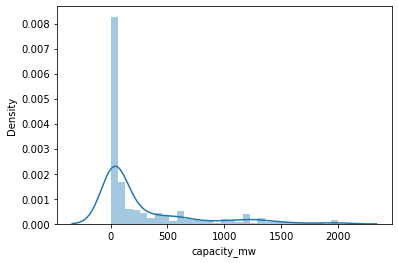

In [100]:
sns.distplot(new_df['capacity_mw'])

the column is skewed right

<AxesSubplot:xlabel='latitude', ylabel='Density'>

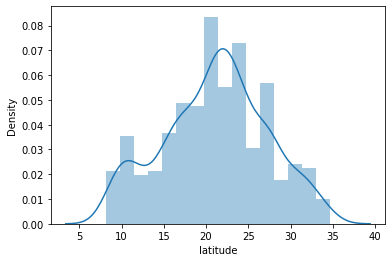

In [101]:
sns.distplot(new_df['latitude'])

there is no skewness

<AxesSubplot:xlabel='longitude', ylabel='Density'>

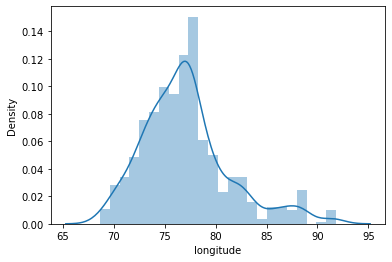

In [102]:
sns.distplot(new_df['longitude'])

this column is rightly skewed

In [104]:
new_df.skew()

capacity_mw           1.994210
latitude             -0.111264
longitude             0.914342
commissioning_year   -1.526273
dtype: float64

In [105]:
skew_cols = ["capacity_mw","longitude","commissioning_year"]

In [106]:
pt=PowerTransformer(method='yeo-johnson')

In [107]:
new_df[skew_cols] = pt.fit_transform(new_df[skew_cols].values)
new_df[skew_cols].head()

,capacity_mw,longitude,commissioning_year
0,-1.677835,-0.931766,0.312870
1,0.222442,-0.513337,0.722763
2,-0.273320,-2.364539,0.722763
3,0.394279,2.443713,-0.320264
4,1.739306,1.251046,0.722763


In [108]:
new_df.skew()

capacity_mw           0.015969
latitude             -0.111264
longitude             0.000200
commissioning_year   -1.089844
dtype: float64

we already applied transformation but still commissioning_year is skewed

# Encoding

In [109]:
le = LabelEncoder()
new_df["primary_fuel"] = le.fit_transform(new_df["primary_fuel"])
new_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,-1.677835,28.1839,-0.931766,6,0.312870,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,0.222442,24.7663,-0.513337,1,0.722763,Ultratech Cement ltd,WRI
2,-0.273320,21.9038,-2.364539,7,0.722763,CDM,WRI
3,0.394279,23.8712,2.443713,2,-0.320264,Central Electricity Authority,WRI
4,1.739306,21.9603,1.251046,1,0.722763,Central Electricity Authority,WRI


In [111]:
oe = OrdinalEncoder()
new_df['geolocation_source'] = oe.fit_transform(new_df['geolocation_source'].values.reshape(-1,1))
new_df['source'] = oe.fit_transform(new_df['source'].values.reshape(-1,1))
new_df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,-1.677835,28.1839,-0.931766,6,0.312870,109.0,1.0
1,0.222442,24.7663,-0.513337,1,0.722763,174.0,2.0
2,-0.273320,21.9038,-2.364539,7,0.722763,21.0,2.0
3,0.394279,23.8712,2.443713,2,-0.320264,22.0,2.0
4,1.739306,21.9603,1.251046,1,0.722763,22.0,2.0


# Seperating features and Label for classification problem

In [115]:
X = new_df.drop('primary_fuel', axis=1)
Y = new_df['primary_fuel']

# Resolving the class imbalance issue in our label column

In [116]:
Y.value_counts()

1    238
3    222
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [117]:
smt = SMOTE()
X, Y = smt.fit_resample(X, Y)


In [118]:
Y.value_counts()

0    238
1    238
2    238
3    238
4    238
5    238
6    238
7    238
Name: primary_fuel, dtype: int64

# Scaling

In [119]:
sc=StandardScaler()
scale_x=sc.fit_transform(X)
X=pd.DataFrame(scale_x,columns=X.columns)

In [121]:
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.816428,1.462720,-0.839166,0.327637,1.206870,-1.186254
1,0.195344,0.858447,-0.368574,0.774032,2.552289,0.369558
2,-0.329505,0.352323,-2.450551,0.774032,-0.614621,0.369558
3,0.377264,0.700183,2.957108,-0.361880,-0.593922,0.369558
4,1.801207,0.362313,1.615760,0.774032,-0.593922,0.369558


# Train test splitting and Model training

In [128]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20, random_state =i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9448818897637795  on Random_state  25


In [129]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.20, random_state =25)

# KNeighborsClassifier

In [130]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))

0.8766404199475065
[[49  0  0  0  0  0  0  4]
 [ 6 34  5  2  2  1  0  1]
 [ 0  1 31  2  3  2  0  0]
 [ 0  3  1 34  0  5  0  3]
 [ 0  0  0  0 50  0  0  0]
 [ 0  0  3  0  1 50  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 2  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        53
           1       0.89      0.67      0.76        51
           2       0.78      0.79      0.78        39
           3       0.89      0.74      0.81        46
           4       0.89      1.00      0.94        50
           5       0.86      0.93      0.89        54
           6       1.00      1.00      1.00        42
           7       0.85      0.96      0.90        46

    accuracy                           0.88       381
   macro avg       0.88      0.88      0.87       381
weighted avg       0.88      0.88      0.87       381



# Support Vector Machine Classifier

In [131]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8346456692913385
[[45  0  0  0  0  0  0  8]
 [ 7 35  3  2  3  0  0  1]
 [ 0  2 23  0  6  6  0  2]
 [ 0  1  0 35  1  7  0  2]
 [ 0  0  0  0 50  0  0  0]
 [ 0  2  2  1  1 44  0  4]
 [ 0  1  0  0  0  0 41  0]
 [ 0  1  0  0  0  0  0 45]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        53
           1       0.83      0.69      0.75        51
           2       0.82      0.59      0.69        39
           3       0.92      0.76      0.83        46
           4       0.82      1.00      0.90        50
           5       0.77      0.81      0.79        54
           6       1.00      0.98      0.99        42
           7       0.73      0.98      0.83        46

    accuracy                           0.83       381
   macro avg       0.84      0.83      0.83       381
weighted avg       0.84      0.83      0.83       381



# DecisionTreeClassifier

In [132]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.884514435695538
[[51  2  0  0  0  0  0  0]
 [ 3 34  6  5  2  1  0  0]
 [ 0  2 34  0  2  1  0  0]
 [ 0  2  2 38  1  3  0  0]
 [ 0  4  0  3 43  0  0  0]
 [ 0  0  3  2  0 49  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 46]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.77      0.67      0.72        51
           2       0.76      0.87      0.81        39
           3       0.79      0.83      0.81        46
           4       0.90      0.86      0.88        50
           5       0.91      0.91      0.91        54
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        46

    accuracy                           0.88       381
   macro avg       0.88      0.89      0.88       381
weighted avg       0.88      0.88      0.88       381



# RandomForestClassifier

In [133]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.937007874015748
[[53  0  0  0  0  0  0  0]
 [ 4 40  2  1  3  1  0  0]
 [ 0  2 33  1  1  2  0  0]
 [ 0  4  0 41  0  1  0  0]
 [ 0  0  0  0 50  0  0  0]
 [ 0  0  1  1  0 52  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 46]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        53
           1       0.87      0.78      0.82        51
           2       0.92      0.85      0.88        39
           3       0.93      0.89      0.91        46
           4       0.93      1.00      0.96        50
           5       0.93      0.96      0.95        54
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        46

    accuracy                           0.94       381
   macro avg       0.94      0.94      0.94       381
weighted avg       0.94      0.94      0.94       381



# Cross validation

In [137]:
cvs = cross_val_score(knc, X, Y, cv=5)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())

Cross Validation of KNeighbors Classifier model  0.8686931896670812


In [138]:
cvs = cross_val_score(dtc, X, Y, cv=5)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())

Cross Validation of DecisionTree Classifier model  0.8681668738776074


In [139]:
cvs = cross_val_score(svc, X, Y, cv=5)
print("Cross Validation of Support Vector Machine Classifier model ",cvs.mean())

Cross Validation of Support Vector Machine Classifier model  0.801997513468711


In [140]:
cvs = cross_val_score(rfc, X, Y, cv=5)
print("Cross Validation of Random Forest Classifier model ",cvs.mean())

Cross Validation of Random Forest Classifier model  0.9065036607266197


Cross validation score is highest for Random Forest,So will do hyper parameter tuning for Random Forest.

# HyperParameter Tuning

In [145]:
rfc = RandomForestClassifier()
parameters={'n_estimators' : [100,200],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10),
            'max_features':["auto","sqrt","log2"],
            }

In [146]:
gridsearch=GridSearchCV(rfc,parameters)

In [147]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [148]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 100}

In [149]:
## Providing Best parameter to model:-
rfc = RandomForestClassifier(criterion='entropy',n_estimators=100,max_features='auto',max_depth=9)
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
score = accuracy_score(y_test,predrfc)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Accuracy Score : 92.38845144356955
[[53  0  0  0  0  0  0  0]
 [ 5 40  0  1  4  1  0  0]
 [ 0  3 32  1  1  2  0  0]
 [ 0  4  0 38  1  3  0  0]
 [ 0  0  0  0 50  0  0  0]
 [ 0  0  1  1  1 51  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 46]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        53
           1       0.85      0.78      0.82        51
           2       0.97      0.82      0.89        39
           3       0.93      0.83      0.87        46
           4       0.88      1.00      0.93        50
           5       0.89      0.94      0.92        54
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        46

    accuracy                           0.92       381
   macro avg       0.93      0.92      0.92       381
weighted avg       0.93      0.92      0.92       381



# Saving the model

In [150]:
joblib.dump(rfc,"Classification_GlobalPowerPlant.pkl")

['Classification_GlobalPowerPlant.pkl']

# Regression

### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and regression label

In [151]:
X = new_df.drop('capacity_mw', axis=1)
Y = new_df['capacity_mw']

### Scaling

In [154]:
sc=StandardScaler()
scale_x=sc.fit_transform(X)
X=pd.DataFrame(scale_x,columns=X.columns)

In [155]:
X.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.159148,-0.931766,1.177139,0.312870,1.400361,-1.038494
1,0.599925,-0.513337,-0.976657,0.722763,2.825448,0.406588
2,0.131533,-2.364539,1.607898,0.722763,-0.528988,0.406588
3,0.453460,2.443713,-0.545898,-0.320264,-0.507063,0.406588
4,0.140779,1.251046,-0.976657,0.722763,-0.507063,0.406588


### Train test splitting and Model training

In [157]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.5416314243512412 on Random State 326


In [159]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=326)

### LinearRegression

In [160]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.5416314243512412

### Random Forest Regression

In [161]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_test = rf.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.6870334026551078

### KNN Regressor

In [162]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test = knr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.6233504517375589

### Xgboost Regressor

In [163]:
xgr = XGBRegressor()
xgr.fit(x_train,y_train)
preddtc = xgr.predict(x_test)
acc = r2_score(y_test,preddtc)
acc

0.6268292112993186

### Decision Tree Regressor

In [170]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test = dtr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.43985511919933007

### Cross Validation

In [166]:
cvs1= cross_val_score(lr,X,Y,cv=5)
print("Cross Validation of Linear Regression model ",cvs1.mean())

Cross Validation of Linear Regression model  0.4193275633144099


In [167]:
cvs2= cross_val_score(rf,X,Y,cv=5)
print("Cross Validation of RandomForest Regression model ",cvs2.mean())

Cross Validation of RandomForest Regression model  0.6110316688436639


In [168]:
cvs3= cross_val_score(knr,X,Y,cv=5)
print("Cross Validation of KNeighbors Regression model ",cvs3.mean())

Cross Validation of KNeighbors Regression model  0.537914149194425


In [171]:
cvs4= cross_val_score(dtr,X,Y,cv=5)
print("Cross Validation of DecisionTree Regression model ",cvs4.mean())

Cross Validation of DecisionTree Regression model  0.32429035790579486


In [173]:
cvs5= cross_val_score(xgr,X,Y,cv=5)
print("Cross Validation of XGboost Regression model ",cvs5.mean())

Cross Validation of XGboost Regression model  0.5629535293437229


Random forest is giving best cv score

# Hyper Parameter Tuning for Random Forest Regressor

In [181]:
param_grid={'criterion' : ['mse', 'mae'],
              'n_estimators' : [100, 200],
              'min_samples_split' : [2, 3],
              'random_state' : [42, 135],
              'n_jobs' : [-1, 1]
             }

In [182]:
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=5)

In [183]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=mse, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42;, score=0.659 total time=   0.3s
[CV 2/5] END criterion=mse, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42;, score=0.513 total time=   0.2s
[CV 3/5] END criterion=mse, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42;, score=0.664 total time=   0.2s
[CV 4/5] END criterion=mse, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42;, score=0.600 total time=   0.3s
[CV 5/5] END criterion=mse, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=42;, score=0.502 total time=   0.5s
[CV 1/5] END criterion=mse, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=135;, score=0.676 total time=   0.2s
[CV 2/5] END criterion=mse, min_samples_split=2, n_estimators=100, n_jobs=-1, random_state=135;, score=0.506 total time=   0.2s
[CV 3/5] END criterion=mse, min_samples_split=2

[CV 1/5] END criterion=mse, min_samples_split=3, n_estimators=200, n_jobs=-1, random_state=135;, score=0.673 total time=   0.4s
[CV 2/5] END criterion=mse, min_samples_split=3, n_estimators=200, n_jobs=-1, random_state=135;, score=0.519 total time=   0.4s
[CV 3/5] END criterion=mse, min_samples_split=3, n_estimators=200, n_jobs=-1, random_state=135;, score=0.668 total time=   0.4s
[CV 4/5] END criterion=mse, min_samples_split=3, n_estimators=200, n_jobs=-1, random_state=135;, score=0.600 total time=   0.4s
[CV 5/5] END criterion=mse, min_samples_split=3, n_estimators=200, n_jobs=-1, random_state=135;, score=0.501 total time=   0.5s
[CV 1/5] END criterion=mse, min_samples_split=3, n_estimators=200, n_jobs=1, random_state=42;, score=0.662 total time=   0.6s
[CV 2/5] END criterion=mse, min_samples_split=3, n_estimators=200, n_jobs=1, random_state=42;, score=0.518 total time=   0.5s
[CV 3/5] END criterion=mse, min_samples_split=3, n_estimators=200, n_jobs=1, random_state=42;, score=0.665 t

[CV 1/5] END criterion=mae, min_samples_split=3, n_estimators=100, n_jobs=1, random_state=42;, score=0.654 total time=   1.3s
[CV 2/5] END criterion=mae, min_samples_split=3, n_estimators=100, n_jobs=1, random_state=42;, score=0.453 total time=   1.6s
[CV 3/5] END criterion=mae, min_samples_split=3, n_estimators=100, n_jobs=1, random_state=42;, score=0.654 total time=   1.2s
[CV 4/5] END criterion=mae, min_samples_split=3, n_estimators=100, n_jobs=1, random_state=42;, score=0.559 total time=   1.2s
[CV 5/5] END criterion=mae, min_samples_split=3, n_estimators=100, n_jobs=1, random_state=42;, score=0.498 total time=   1.5s
[CV 1/5] END criterion=mae, min_samples_split=3, n_estimators=100, n_jobs=1, random_state=135;, score=0.662 total time=   1.1s
[CV 2/5] END criterion=mae, min_samples_split=3, n_estimators=100, n_jobs=1, random_state=135;, score=0.488 total time=   1.2s
[CV 3/5] END criterion=mae, min_samples_split=3, n_estimators=100, n_jobs=1, random_state=135;, score=0.676 total ti

GridSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mse'),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]},
             verbose=5)

In [184]:
rf_grid.best_params_

{'criterion': 'mse',
 'min_samples_split': 3,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 42}

In [185]:
rf=RandomForestRegressor(criterion='mse',min_samples_split=3,
 n_estimators= 200,n_jobs=-1,random_state=42)

In [186]:
rf.fit(x_train,y_train)
pred_test = rf.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.6749775800016911

In [187]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_test))
print('Mean squared Error: ', mean_squared_error(y_test,pred_test))

Mean Absolute Error:  0.45511148184431727
Mean squared Error:  0.353988131569186


In [189]:
#Saving the model
joblib.dump(rf,"Regression_GlobalPowerPlant.pkl")

['Regression_GlobalPowerPlant.pkl']